In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

Read the dataset IMDB reviews

In [ ]:
#Read the dataset IMDB reviews
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.G389L4_1.0.0/imdb_reviews-train.tfrecor…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.G389L4_1.0.0/imdb_reviews-test.tfrecord…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.G389L4_1.0.0/imdb_reviews-unsupervised.…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
train_data, test_data = imdb['train'], imdb['test']

In [ ]:
type(train_data)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [ ]:
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

for s, l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())

for s, l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())

In [ ]:
training_labels

[0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,


In [ ]:
info

tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/plain_text/1.0.0',
    description="""
    Large Movie Review Dataset. This is a dataset for binary sentiment
    classification containing substantially more data than previous benchmark
    datasets. We provide a set of 25,000 highly polar movie reviews for training,
    and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Plain text
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_dir=PosixGPath('/tmp/tmpzwnv9ocdtfds'),
    file_format=tfrecord,
    download_size=80.23 MiB,
    dataset_size=129.83 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
        'text': Text(shape=(), dtype=string),
    }),
    supervised_keys=('text', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=25000, num_shards=1>,
        'train': <SplitInfo

In [ ]:
training_sentences[0]

'b"This was an absolutely terrible movie. Don\'t be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie\'s ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor\'s like Christopher Walken\'s good name. I could barely sit through it."'

In [ ]:
training_labels[3]

1

In [ ]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [ ]:
len(training_sentences), len(testing_sentences)

(25000, 25000)

In [ ]:
training_labels_final.shape, testing_labels_final.shape

((25000,), (25000,))

In [ ]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type = 'post'

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words = vocab_size)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
word_index;
len(word_index)

86538

In [ ]:
#proceed with the further code
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length)

In [ ]:
len(sequences)

25000

In [ ]:
len(padded[0])

120

In [ ]:
# continue writing the code
len(sequences[0])

110

In [ ]:
padded.shape

(25000, 120)

In [ ]:
padded.dtype

dtype('int32')

Build a simpleRNN Model

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

In [ ]:
help(SimpleRNN)

Help on class SimpleRNN in module keras.src.layers.rnn.simple_rnn:

class SimpleRNN(keras.src.layers.rnn.base_rnn.RNN)
 |  SimpleRNN(units, activation='tanh', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, return_sequences=False, return_state=False, go_backwards=False, stateful=False, unroll=False, **kwargs)
 |  
 |  Fully-connected RNN where the output is to be fed back to input.
 |  
 |  See [the Keras RNN API guide](https://www.tensorflow.org/guide/keras/rnn)
 |  for details about the usage of RNN API.
 |  
 |  Args:
 |    units: Positive integer, dimensionality of the output space.
 |    activation: Activation function to use.
 |      Default: hyperbolic tangent (`tanh`).
 |      If you pass None, no activat

In [ ]:
model_rnn = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    SimpleRNN(32),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           160000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                1568      
                                                                 
 dense (Dense)               (None, 10)                330       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 161909 (632.46 KB)
Trainable params: 161909 (632.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compile the RNN model

In [ ]:
model_rnn.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

In [ ]:
history = model_rnn.fit(padded, training_labels_final, epochs=10, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 130s 162ms/step - loss: 0.6949 - accuracy: 0.5083 - val_loss: 0.6914 - val_accuracy: 0.5223
Epoch 2/10
782/782 [==============================] - 97s 124ms/step - loss: 0.6802 - accuracy: 0.5693 - val_loss: 0.6450 - val_accuracy: 0.6278
Epoch 3/10
782/782 [==============================] - 93s 119ms/step - loss: 0.5576 - accuracy: 0.7195 - val_loss: 0.5989 - val_accuracy: 0.6732
Epoch 4/10
782/782 [==============================] - 92s 118ms/step - loss: 0.4684 - accuracy: 0.7778 - val_loss: 0.4510 - val_accuracy: 0.7897
Epoch 5/10
782/782 [==============================] - 104s 134ms/step - loss: 0.3200 - accuracy: 0.8664 - val_loss: 0.4120 - val_accuracy: 0.8388
Epoch 6/10
782/782 [==============================] - 92s 118ms/step - loss: 0.2437 - accuracy: 0.9074 - val_loss: 0.4120 - val_accuracy: 0.8333
Epoch 7/10
782/782 [==============================] - 92s 117ms/step - loss: 0.1924 - accuracy: 0.9288 - val_loss: 0.4576 - val_

In [ ]:
import matplotlib.pyplot as plt

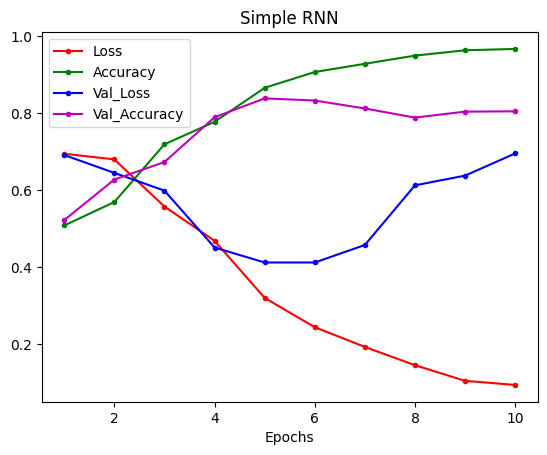

In [ ]:
plt.title("Simple RNN")
plt.xlabel('Epochs')
plt.plot(range(1,11), history.history['loss'], color='r', label='Loss', marker='.')
plt.plot(range(1,11), history.history['accuracy'], color='g',label='Accuracy',marker='.')
plt.plot(range(1,11), history.history['val_loss'], color='b', label='Val_Loss',marker='.')
plt.plot(range(1,11), history.history['val_accuracy'], color='m', label='Val_Accuracy',marker='.')
plt.legend(loc='upper left')
plt.show()

Build the model for LSTM

In [ ]:
from keras.layers import LSTM, Bidirectional, GRU

In [ ]:
model_lstm = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Bidirectional(LSTM(32)),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional (Bidirection  (None, 64)                12544     
 al)                                                             
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 173205 (676.58 KB)
Trainable params: 173205 (676.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compile LSTM model

In [ ]:
#compile the model
model_lstm.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

In [ ]:
#Train the LSTM model
history_lstm = model_lstm.fit(padded, training_labels_final, epochs=10, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 37s 42ms/step - loss: 0.4612 - accuracy: 0.7698 - val_loss: 0.3449 - val_accuracy: 0.8536
Epoch 2/10
782/782 [==============================] - 18s 23ms/step - loss: 0.2846 - accuracy: 0.8868 - val_loss: 0.3413 - val_accuracy: 0.8499
Epoch 3/10
782/782 [==============================] - 15s 19ms/step - loss: 0.2275 - accuracy: 0.9134 - val_loss: 0.3634 - val_accuracy: 0.8394
Epoch 4/10
782/782 [==============================] - 15s 19ms/step - loss: 0.1786 - accuracy: 0.9367 - val_loss: 0.4015 - val_accuracy: 0.8357
Epoch 5/10
782/782 [==============================] - 14s 18ms/step - loss: 0.1361 - accuracy: 0.9516 - val_loss: 0.4849 - val_accuracy: 0.8308
Epoch 6/10
782/782 [==============================] - 14s 18ms/step - loss: 0.0989 - accuracy: 0.9665 - val_loss: 0.5340 - val_accuracy: 0.8266
Epoch 7/10
782/782 [==============================] - 14s 18ms/step - loss: 0.0716 - accuracy: 0.9767 - val_loss: 0.7413 - val_accuracy:

In [ ]:
#compile the model
model_gru= Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Bidirectional(GRU(32)),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_gru.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                9600      
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 170261 (665.08 KB)
Trainable params: 170261 (665.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_gru.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

In [ ]:
history_gru = model_gru.fit(padded, training_labels_final, epochs=10, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 38s 43ms/step - loss: 0.4990 - accuracy: 0.7324 - val_loss: 0.3486 - val_accuracy: 0.8520
Epoch 2/10
782/782 [==============================] - 21s 27ms/step - loss: 0.2917 - accuracy: 0.8830 - val_loss: 0.3603 - val_accuracy: 0.8516
Epoch 3/10
782/782 [==============================] - 16s 20ms/step - loss: 0.2278 - accuracy: 0.9140 - val_loss: 0.3654 - val_accuracy: 0.8424
Epoch 4/10
782/782 [==============================] - 14s 17ms/step - loss: 0.1775 - accuracy: 0.9360 - val_loss: 0.4261 - val_accuracy: 0.8326
Epoch 5/10
782/782 [==============================] - 14s 18ms/step - loss: 0.1334 - accuracy: 0.9547 - val_loss: 0.4610 - val_accuracy: 0.8273
Epoch 6/10
782/782 [==============================] - 14s 18ms/step - loss: 0.0977 - accuracy: 0.9664 - val_loss: 0.5468 - val_accuracy: 0.8188
Epoch 7/10
782/782 [==============================] - 14s 17ms/step - loss: 0.0625 - accuracy: 0.9804 - val_loss: 0.7029 - val_accuracy:

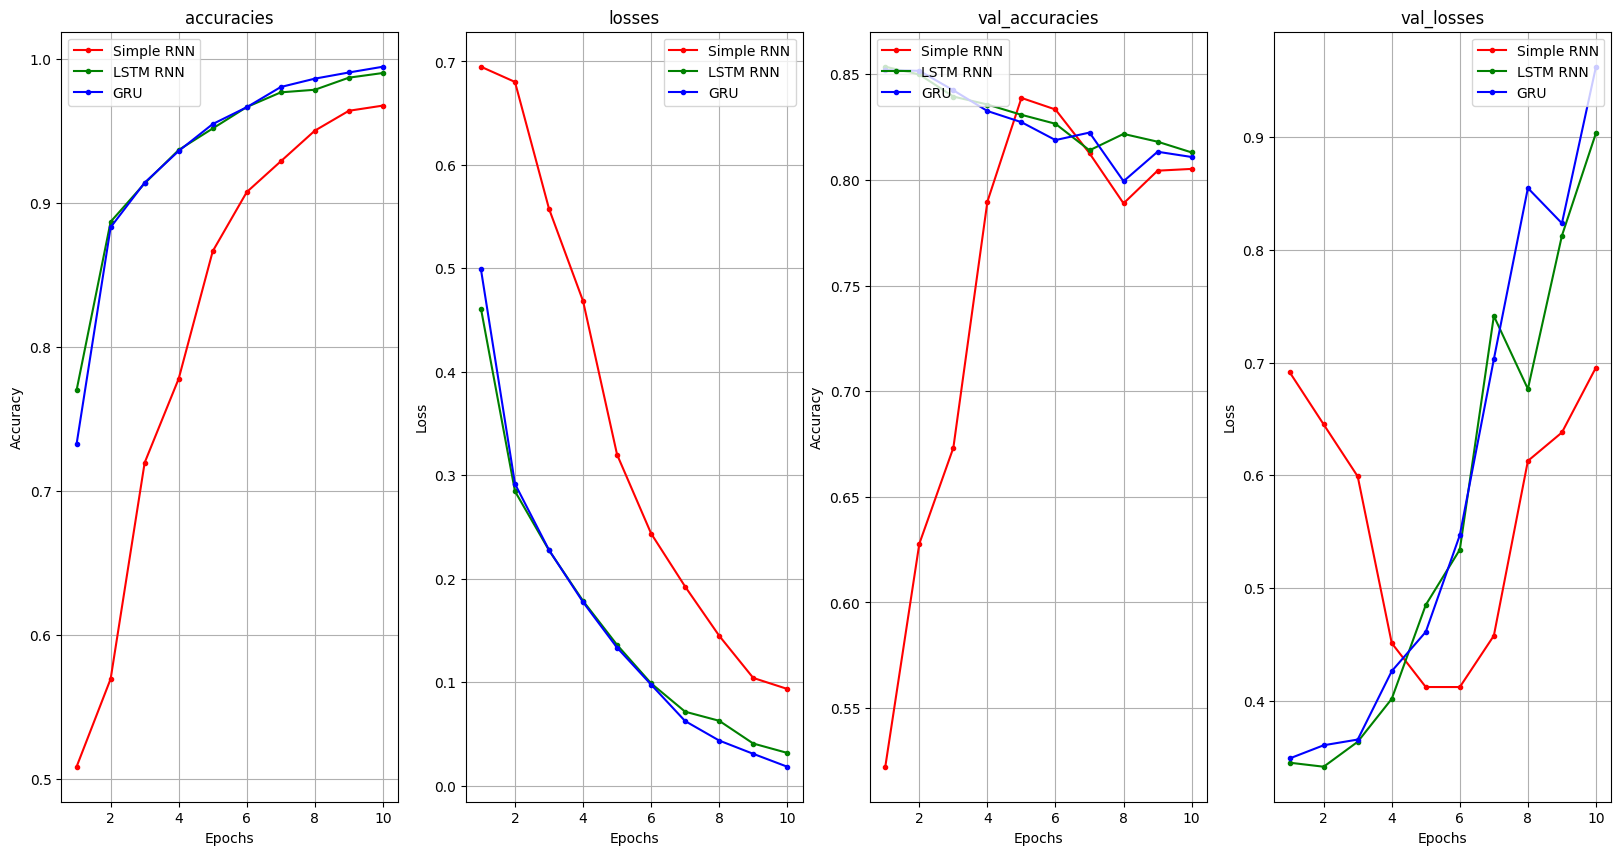

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,4,1)
plt.title('accuracies')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.plot(range(1,11),history.history['accuracy'],c="r",label = "Simple RNN",marker =".")
plt.plot(range(1,11),history_lstm.history['accuracy'],c="g",label = "LSTM RNN",marker =".")
plt.plot(range(1,11),history_gru.history['accuracy'],c="b",label = "GRU",marker =".")
plt.legend(loc = "upper left")

plt.subplot(1,4,2)
plt.title('losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.plot(range(1,11),history.history['loss'],c="r",label = "Simple RNN",marker =".")
plt.plot(range(1,11),history_lstm.history['loss'],c="g",label = "LSTM RNN",marker =".")
plt.plot(range(1,11),history_gru.history['loss'],c="b",label = "GRU",marker =".")
plt.legend(loc = "upper right")

plt.subplot(1,4,3)
plt.title('val_accuracies')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.plot(range(1,11),history.history['val_accuracy'],c="r",label = "Simple RNN",marker =".")
plt.plot(range(1,11),history_lstm.history['val_accuracy'],c="g",label = "LSTM RNN",marker =".")
plt.plot(range(1,11),history_gru.history['val_accuracy'],c="b",label = "GRU",marker =".")
plt.legend(loc = "upper left")

plt.subplot(1,4,4)
plt.title('val_losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.plot(range(1,11),history.history['val_loss'],c="r",label = "Simple RNN",marker =".")
plt.plot(range(1,11),history_lstm.history['val_loss'],c="g",label = "LSTM RNN",marker =".")
plt.plot(range(1,11),history_gru.history['val_loss'],c="b",label = "GRU",marker =".")
plt.legend(loc = "upper right")

plt.show()

In [ ]:
new1 = 'This was worst movie. Please do not watch it. Waste of money and time.'
new2 = 'This was the best movie. Please watch it.'
new3 = 'A must watch movie. I loved to watch it. It was jsut amazing.'

In [ ]:
def predict1(new):
  new = tokenizer.texts_to_sequences([new])
  new = pad_sequences(new, maxlen=max_length)
  return model_rnn.predict(new), model_lstm.predict(new), model_gru.predict(new)

In [ ]:
rnn1, lstm1, gru1 = predict1(new1)
rnn2, lstm2, gru2 = predict1(new2)
rnn3, lstm3, gru3 = predict1(new3)

1/1 [==============================] - 0s 19ms/step


In [ ]:
print('rnn output:',rnn1,rnn2,rnn3)

rnn output: [[0.0086839]] [[0.9956155]] [[0.9960651]]


In [ ]:
def output_form(x):
  if x > 0.5:
    return 1,'P'
  else:
    return 0,'N'

In [ ]:
print('rnn output:',output_form(rnn1),output_form(rnn2),output_form(rnn3))

rnn output: (0, 'N') (1, 'P') (1, 'P')


In [ ]:
print(f'lstm output :text1{output_form(lstm1)}, probability{lstm1}')
print(f'gru output :text1{output_form(gru1)}, probability{gru1}')

lstm output :text1(0, 'N'), probability[[7.96723e-06]]
gru output :text1(0, 'N'), probability[[6.325122e-06]]


In [ ]:
print(f'lstm output :text2{output_form(lstm2)}, probability{lstm2}')
print(f'gru output :text2{output_form(gru2)}, probability{gru2}')

lstm output :text2(1, 'P'), probability[[0.8902923]]
gru output :text2(1, 'P'), probability[[0.99921083]]


In [ ]:
print(f'lstm output :text3{output_form(lstm3)}, probability{lstm3}')
print(f'gru output :text3{output_form(gru3)}, probability{gru3}')

lstm output :text3(1, 'P'), probability[[0.99931026]]
gru output :text3(1, 'P'), probability[[0.9999969]]
